In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

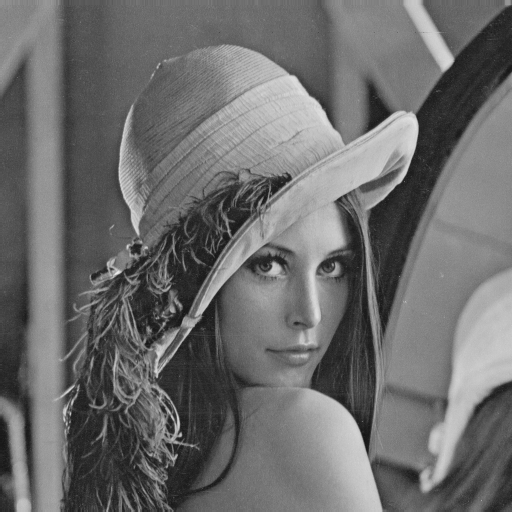

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')

def grayscale(im):
  return 0.289*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2]

gs = grayscale(image)
cv2_imshow(gs)

In [ ]:
ker = np.array(([1,1,1],
                [1,1,1],
                [1,1,1]))
kernel = (1/9)*ker

In [ ]:
def convolve2D(image, kernel, padding=0):
    # Gather Shapes of Kernel + Image + Padding
    (xKern, yKern) = kernel.shape
    (xImg, yImg) = image.shape

    # Shape of Output Convolution
    xOutput = int((xImg - xKern + 2 * padding) + 1)
    yOutput = int((yImg - yKern + 2 * padding) + 1)
    output = np.zeros((xOutput, yOutput))

    # Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image  #inner of padding is with image
    else:
        imagePadded = image

    # Convolution
    for y in range(image.shape[1]):
          for x in range(image.shape[0]):
              output[x, y] = (kernel * imagePadded[x: x + xKern, y: y + yKern]).sum().astype("int")

    return output

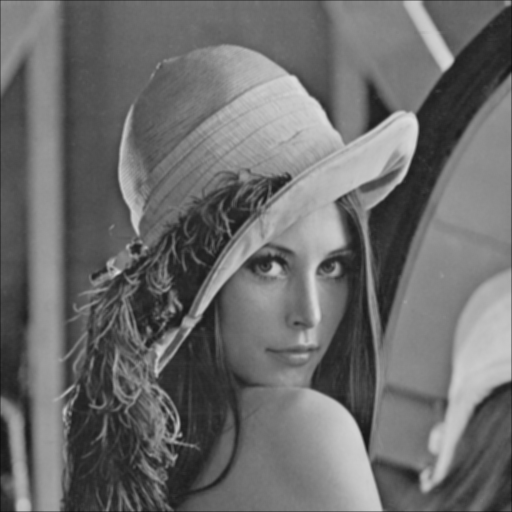

In [ ]:
img = convolve2D(gs, kernel,padding = 1)
cv2_imshow(img)